In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [2]:
!nvidia-smi

Mon Jan 18 08:13:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install h2o

     |████████████████████████████████| 164.6MB 96kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.3-py2.py3-none-any.whl size=164649662 sha256=dd9989d493d98a6ed366545b1eeda2e87086c9e5de9dc2cdf222d25563677ce9
  Stored in directory: /root/.cache/pip/wheels/0a/fd/63/96d322a27867a81a2904172a75aed5241913d603a4b8c4b277
Successfully built h2o


In [4]:
import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgw2wvir7
  JVM stdout: /tmp/tmpgw2wvir7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgw2wvir7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_rn5pwn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [9]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [11]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [12]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [13]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No
9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.7,7382.25,No


In [18]:
y = 'Churn'
x = churn_df.columns
x.remove(y)
x.remove('customerID')

In [19]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [20]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
08:30:52.296: Project: AutoML_20210118_83052292
08:30:52.297: Cross-validation disabled by user: no fold column nor nfolds > 1.
08:30:52.297: Setting stopping tolerance adaptively based on the training frame: 0.014240738076707171
08:30:52.297: Build control seed: 10
08:30:52.298: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
08:30:52.392: training frame: Frame key: automl_training_py_2_sid_9162    cols: 21    rows: 4453  chunks: 8    size: 294871  checksum: -3313823682004109615
08:30:52.393: validation frame: Frame key: py_4_sid_9162    cols: 21    rows: 1072  chunks: 8    size: 139471  checksum: 1887780975558294155
08:30:52.398: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_9162    cols: 21    rows: 478  chunks: 8    size: 124480  checksum: 1663095345788407627
08:30:52.398: blending frame: NULL
08:30:52.399: response column: Churn
08

In [21]:
lb = aml.leaderboard

In [22]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_20210118_083052,0.858486,0.389405,0.701581,0.224182,0.350961,0.123174
XGBoost_2_AutoML_20210118_083052,0.855904,0.395159,0.705547,0.216473,0.35259,0.124319
GBM_5_AutoML_20210118_083052,0.851436,0.399102,0.678568,0.213464,0.355649,0.126486
GLM_1_AutoML_20210118_083052,0.850534,0.405529,0.655329,0.225861,0.359888,0.12952
XGBoost_3_AutoML_20210118_083052,0.849943,0.402575,0.677057,0.229715,0.358411,0.128458
GBM_1_AutoML_20210118_083052,0.849793,0.401775,0.67851,0.216334,0.35703,0.12747
GBM_4_AutoML_20210118_083052,0.849793,0.404483,0.682126,0.201276,0.357286,0.127653
GBM_3_AutoML_20210118_083052,0.845336,0.409011,0.66322,0.218649,0.357731,0.127972
DRF_1_AutoML_20210118_083052,0.844133,0.467337,0.699228,0.235942,0.35802,0.128178
XGBoost_1_AutoML_20210118_083052,0.838658,0.427121,0.660551,0.233639,0.367563,0.135102


In [23]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [24]:
churn_pred.head()

predict,No,Yes
Yes,0.336219,0.663781
Yes,0.599856,0.400144
No,0.812754,0.187246
No,0.947053,0.0529473
No,0.959565,0.0404354
No,0.956447,0.0435528
Yes,0.478714,0.521286
Yes,0.731269,0.268731
No,0.949207,0.0507929
No,0.944908,0.0550918


In [26]:
# performence report
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1423805465931183
RMSE: 0.37733346868932566
LogLoss: 0.43241493204333964
Mean Per-Class Error: 0.24063064638340037
AUC: 0.8334329039653398
AUCPR: 0.5984965995801954
Gini: 0.6668658079306795

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27570201170869063: 


,,No,Yes,Error,Rate
0,No,604.0,170.0,0.2196,(170.0/774.0)
1,Yes,70.0,196.0,0.2632,(70.0/266.0)
2,Total,674.0,366.0,0.2308,(240.0/1040.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.275702,0.620253,221.0
1,max f2,0.083375,0.742371,329.0
2,max f0point5,0.405485,0.591603,164.0
3,max accuracy,0.559224,0.794231,115.0
4,max precision,0.941631,1.000000,0.0
5,max recall,0.034578,1.000000,372.0
6,max specificity,0.941631,1.000000,0.0
7,max absolute_mcc,0.275702,0.472501,221.0
8,max min_per_class_accuracy,0.260714,0.758398,230.0
9,max mean_per_class_accuracy,0.256162,0.759369,233.0



Gains/Lift Table: Avg response rate: 25.58 %, avg score: 25.81 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010577,0.903784,3.198906,3.198906,0.818182,0.911432,0.818182,0.911432,0.033835,0.033835,219.890636,219.890636,0.031251
1,2,0.020192,0.891147,2.345865,2.792696,0.600000,0.896524,0.714286,0.904333,0.022556,0.056391,134.586466,179.269603,0.048639
2,3,0.030769,0.878086,2.488038,2.687970,0.636364,0.883307,0.687500,0.897106,0.026316,0.082707,148.803828,168.796992,0.069787
3,4,0.040385,0.847946,2.736842,2.699606,0.700000,0.868543,0.690476,0.890305,0.026316,0.109023,173.684211,169.960616,0.092227
4,5,0.050000,0.815704,3.518797,2.857143,0.900000,0.831846,0.730769,0.879063,0.033835,0.142857,251.879699,185.714286,0.124769
5,6,0.100000,0.686907,2.556391,2.706767,0.653846,0.747438,0.692308,0.813250,0.127820,0.270677,155.639098,170.676692,0.229333
6,7,0.150000,0.597297,2.330827,2.581454,0.596154,0.641825,0.660256,0.756109,0.116541,0.387218,133.082707,158.145363,0.318743
7,8,0.200000,0.514173,1.729323,2.368421,0.442308,0.553713,0.605769,0.705510,0.086466,0.473684,72.932331,136.842105,0.367741
8,9,0.300000,0.338207,1.804511,2.180451,0.461538,0.413086,0.557692,0.608035,0.180451,0.654135,80.451128,118.045113,0.475841
9,10,0.400000,0.239429,1.278195,1.954887,0.326923,0.283914,0.500000,0.527005,0.127820,0.781955,27.819549,95.488722,0.513221


In [27]:
# list out the all the models
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [28]:
model_ids

['GBM_2_AutoML_20210118_083052',
 'XGBoost_2_AutoML_20210118_083052',
 'GBM_5_AutoML_20210118_083052',
 'GLM_1_AutoML_20210118_083052',
 'XGBoost_3_AutoML_20210118_083052',
 'GBM_1_AutoML_20210118_083052',
 'GBM_4_AutoML_20210118_083052',
 'GBM_3_AutoML_20210118_083052',
 'DRF_1_AutoML_20210118_083052',
 'XGBoost_1_AutoML_20210118_083052']

In [29]:
# we select one model and validate the model
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20210118_083052


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1028831122688069
RMSE: 0.3207539746734355
LogLoss: 0.3283713882593027
Mean Per-Class Error: 0.16512693486377694
AUC: 0.9127064949433371
AUCPR: 0.8089563122610722
Gini: 0.8254129898866742

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3525665785585131: 


,,No,Yes,Error,Rate
0,No,2818.0,438.0,0.1345,(438.0/3256.0)
1,Yes,251.0,946.0,0.2097,(251.0/1197.0)
2,Total,3069.0,1384.0,0.1547,(689.0/4453.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.352567,0.733049,209.0
1,max f2,0.230736,0.809488,260.0
2,max f0point5,0.579119,0.763524,128.0
3,max accuracy,0.510640,0.856277,153.0
4,max precision,0.965753,1.000000,0.0
5,max recall,0.019982,1.000000,381.0
6,max specificity,0.965753,1.000000,0.0
7,max absolute_mcc,0.352567,0.628183,209.0
8,max min_per_class_accuracy,0.308586,0.834152,228.0
9,max mean_per_class_accuracy,0.311481,0.834873,227.0



Gains/Lift Table: Avg response rate: 26.88 %, avg score: 26.93 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010106,0.943536,3.720134,3.720134,1.000000,0.952608,1.000000,0.952608,0.037594,0.037594,272.013367,272.013367,0.037594
1,2,0.020211,0.925787,3.720134,3.720134,1.000000,0.933744,1.000000,0.943176,0.037594,0.075188,272.013367,272.013367,0.075188
2,3,0.030092,0.911033,3.466488,3.636847,0.931818,0.919200,0.977612,0.935303,0.034252,0.109440,246.648819,263.684709,0.108519
3,4,0.040198,0.886779,3.389455,3.574654,0.911111,0.898959,0.960894,0.926166,0.034252,0.143693,238.945512,257.465358,0.141543
4,5,0.050079,0.860792,3.212843,3.503265,0.863636,0.874378,0.941704,0.915948,0.031746,0.175439,221.284271,250.326489,0.171446
5,6,0.100157,0.736750,3.353125,3.428195,0.901345,0.801111,0.921525,0.858530,0.167920,0.343358,235.312496,242.819493,0.332609
6,7,0.150011,0.627837,2.831994,3.230056,0.761261,0.680650,0.868263,0.799414,0.141186,0.484545,183.199365,223.005618,0.457518
7,8,0.200090,0.542490,2.285463,2.993643,0.614350,0.585563,0.804714,0.745891,0.114453,0.598997,128.546328,199.364292,0.545558
8,9,0.300022,0.366895,1.738849,2.575691,0.467416,0.455305,0.692365,0.649102,0.173768,0.772765,73.884900,157.569135,0.646537
9,10,0.399955,0.244689,1.120220,2.212028,0.301124,0.303268,0.594610,0.562692,0.111947,0.884712,12.022003,121.202782,0.662967




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.14773373585432817
RMSE: 0.384361465100663
LogLoss: 0.45551534707649627
Mean Per-Class Error: 0.26451994025725045
AUC: 0.8192046189170511
AUCPR: 0.6266582238518722
Gini: 0.6384092378341022

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4033457140127818: 


,,No,Yes,Error,Rate
0,No,672.0,115.0,0.1461,(115.0/787.0)
1,Yes,113.0,172.0,0.3965,(113.0/285.0)
2,Total,785.0,287.0,0.2127,(228.0/1072.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.403346,0.601399,165.0
1,max f2,0.094640,0.739695,313.0
2,max f0point5,0.583203,0.619512,108.0
3,max accuracy,0.583203,0.798507,108.0
4,max precision,0.971808,1.000000,0.0
5,max recall,0.009250,1.000000,390.0
6,max specificity,0.971808,1.000000,0.0
7,max absolute_mcc,0.407976,0.456929,164.0
8,max min_per_class_accuracy,0.246881,0.722807,232.0
9,max mean_per_class_accuracy,0.167825,0.735480,268.0



Gains/Lift Table: Avg response rate: 26.59 %, avg score: 26.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010261,0.932371,3.419458,3.419458,0.909091,0.951223,0.909091,0.951223,0.035088,0.035088,241.945774,241.945774,0.033817
1,2,0.020522,0.916883,3.761404,3.590431,1.000000,0.926193,0.954545,0.938708,0.038596,0.073684,276.140351,259.043062,0.072414
2,3,0.030784,0.897766,2.051675,3.077512,0.545455,0.908451,0.818182,0.928622,0.021053,0.094737,105.167464,207.751196,0.087113
3,4,0.040112,0.867590,2.632982,2.974133,0.700000,0.878706,0.790698,0.917014,0.024561,0.119298,163.298246,197.413301,0.107862
4,5,0.050373,0.839197,2.393620,2.855880,0.636364,0.855128,0.759259,0.904408,0.024561,0.143860,139.362041,185.588044,0.127341
5,6,0.100746,0.751032,2.646914,2.751397,0.703704,0.794014,0.731481,0.849211,0.133333,0.277193,164.691358,175.139701,0.240344
6,7,0.150187,0.627712,2.483946,2.663354,0.660377,0.692110,0.708075,0.797494,0.122807,0.400000,148.394571,166.335404,0.340280
7,8,0.200560,0.524075,1.880702,2.466781,0.500000,0.572468,0.655814,0.740976,0.094737,0.494737,88.070175,146.678091,0.400709
8,9,0.300373,0.358534,1.335826,2.090967,0.355140,0.437841,0.555901,0.640245,0.133333,0.628070,33.582555,109.096655,0.446368
9,10,0.400187,0.238974,0.984293,1.814943,0.261682,0.300973,0.482517,0.555625,0.098246,0.726316,-1.570749,81.494295,0.444232




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-01-18 08:30:55,0.003 sec,0.0,0.500000,0.693147,0.500000,0.268808,1.000000,0.731192,0.500000,0.693147,0.500000,0.265858,1.000000,0.734142
1,,2021-01-18 08:30:55,0.288 sec,5.0,0.359153,0.416202,0.875953,0.728699,3.332620,0.179430,0.381054,0.452506,0.829272,0.628390,3.419458,0.289179
2,,2021-01-18 08:30:55,0.453 sec,10.0,0.343240,0.373563,0.886520,0.752711,3.558389,0.182574,0.381669,0.442680,0.823801,0.610179,3.077512,0.259328
3,,2021-01-18 08:30:56,0.612 sec,15.0,0.335853,0.356608,0.895086,0.770614,3.720134,0.183247,0.381208,0.443397,0.825631,0.623088,3.419458,0.232276
4,,2021-01-18 08:30:56,1.000 sec,20.0,0.330459,0.346323,0.901481,0.783749,3.720134,0.183472,0.382429,0.447253,0.823409,0.623436,3.419458,0.220149
5,,2021-01-18 08:30:56,1.253 sec,25.0,0.326020,0.338260,0.906354,0.796146,3.720134,0.168875,0.385253,0.453830,0.819601,0.617549,3.447953,0.234142
6,,2021-01-18 08:30:56,1.414 sec,30.0,0.320754,0.328371,0.912706,0.808956,3.720134,0.154727,0.384361,0.455515,0.819205,0.626658,3.419458,0.212687



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,856.736511,1.000000,0.238802
1,tenure,480.425964,0.560763,0.133911
2,TotalCharges,475.825989,0.555394,0.132629
3,MonthlyCharges,461.269196,0.538403,0.128571
4,InternetService.Fiber optic,162.769150,0.189987,0.045369
5,OnlineSecurity.No,133.596497,0.155937,0.037238
6,TechSupport.No,119.017044,0.138919,0.033174
7,gender.Female,107.820534,0.125850,0.030053
8,Contract.Two year,74.151611,0.086551,0.020669
9,PaperlessBilling.No,66.343399,0.077437,0.018492



See the whole table with table.as_data_frame()


In [30]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [31]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [32]:
# convert the model from h2o to xgboost model
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 20,
  'min_child_weight': 10.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 11,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 10000)

In [33]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20210118_083052


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1028831122688069
RMSE: 0.3207539746734355
LogLoss: 0.3283713882593027
Mean Per-Class Error: 0.16512693486377694
AUC: 0.9127064949433371
AUCPR: 0.8089563122610722
Gini: 0.8254129898866742

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3525665785585131: 


,,No,Yes,Error,Rate
0,No,2818.0,438.0,0.1345,(438.0/3256.0)
1,Yes,251.0,946.0,0.2097,(251.0/1197.0)
2,Total,3069.0,1384.0,0.1547,(689.0/4453.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.352567,0.733049,209.0
1,max f2,0.230736,0.809488,260.0
2,max f0point5,0.579119,0.763524,128.0
3,max accuracy,0.510640,0.856277,153.0
4,max precision,0.965753,1.000000,0.0
5,max recall,0.019982,1.000000,381.0
6,max specificity,0.965753,1.000000,0.0
7,max absolute_mcc,0.352567,0.628183,209.0
8,max min_per_class_accuracy,0.308586,0.834152,228.0
9,max mean_per_class_accuracy,0.311481,0.834873,227.0



Gains/Lift Table: Avg response rate: 26.88 %, avg score: 26.93 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010106,0.943536,3.720134,3.720134,1.000000,0.952608,1.000000,0.952608,0.037594,0.037594,272.013367,272.013367,0.037594
1,2,0.020211,0.925787,3.720134,3.720134,1.000000,0.933744,1.000000,0.943176,0.037594,0.075188,272.013367,272.013367,0.075188
2,3,0.030092,0.911033,3.466488,3.636847,0.931818,0.919200,0.977612,0.935303,0.034252,0.109440,246.648819,263.684709,0.108519
3,4,0.040198,0.886779,3.389455,3.574654,0.911111,0.898959,0.960894,0.926166,0.034252,0.143693,238.945512,257.465358,0.141543
4,5,0.050079,0.860792,3.212843,3.503265,0.863636,0.874378,0.941704,0.915948,0.031746,0.175439,221.284271,250.326489,0.171446
5,6,0.100157,0.736750,3.353125,3.428195,0.901345,0.801111,0.921525,0.858530,0.167920,0.343358,235.312496,242.819493,0.332609
6,7,0.150011,0.627837,2.831994,3.230056,0.761261,0.680650,0.868263,0.799414,0.141186,0.484545,183.199365,223.005618,0.457518
7,8,0.200090,0.542490,2.285463,2.993643,0.614350,0.585563,0.804714,0.745891,0.114453,0.598997,128.546328,199.364292,0.545558
8,9,0.300022,0.366895,1.738849,2.575691,0.467416,0.455305,0.692365,0.649102,0.173768,0.772765,73.884900,157.569135,0.646537
9,10,0.399955,0.244689,1.120220,2.212028,0.301124,0.303268,0.594610,0.562692,0.111947,0.884712,12.022003,121.202782,0.662967




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.14773373585432817
RMSE: 0.384361465100663
LogLoss: 0.45551534707649627
Mean Per-Class Error: 0.26451994025725045
AUC: 0.8192046189170511
AUCPR: 0.6266582238518722
Gini: 0.6384092378341022

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4033457140127818: 


,,No,Yes,Error,Rate
0,No,672.0,115.0,0.1461,(115.0/787.0)
1,Yes,113.0,172.0,0.3965,(113.0/285.0)
2,Total,785.0,287.0,0.2127,(228.0/1072.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.403346,0.601399,165.0
1,max f2,0.094640,0.739695,313.0
2,max f0point5,0.583203,0.619512,108.0
3,max accuracy,0.583203,0.798507,108.0
4,max precision,0.971808,1.000000,0.0
5,max recall,0.009250,1.000000,390.0
6,max specificity,0.971808,1.000000,0.0
7,max absolute_mcc,0.407976,0.456929,164.0
8,max min_per_class_accuracy,0.246881,0.722807,232.0
9,max mean_per_class_accuracy,0.167825,0.735480,268.0



Gains/Lift Table: Avg response rate: 26.59 %, avg score: 26.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010261,0.932371,3.419458,3.419458,0.909091,0.951223,0.909091,0.951223,0.035088,0.035088,241.945774,241.945774,0.033817
1,2,0.020522,0.916883,3.761404,3.590431,1.000000,0.926193,0.954545,0.938708,0.038596,0.073684,276.140351,259.043062,0.072414
2,3,0.030784,0.897766,2.051675,3.077512,0.545455,0.908451,0.818182,0.928622,0.021053,0.094737,105.167464,207.751196,0.087113
3,4,0.040112,0.867590,2.632982,2.974133,0.700000,0.878706,0.790698,0.917014,0.024561,0.119298,163.298246,197.413301,0.107862
4,5,0.050373,0.839197,2.393620,2.855880,0.636364,0.855128,0.759259,0.904408,0.024561,0.143860,139.362041,185.588044,0.127341
5,6,0.100746,0.751032,2.646914,2.751397,0.703704,0.794014,0.731481,0.849211,0.133333,0.277193,164.691358,175.139701,0.240344
6,7,0.150187,0.627712,2.483946,2.663354,0.660377,0.692110,0.708075,0.797494,0.122807,0.400000,148.394571,166.335404,0.340280
7,8,0.200560,0.524075,1.880702,2.466781,0.500000,0.572468,0.655814,0.740976,0.094737,0.494737,88.070175,146.678091,0.400709
8,9,0.300373,0.358534,1.335826,2.090967,0.355140,0.437841,0.555901,0.640245,0.133333,0.628070,33.582555,109.096655,0.446368
9,10,0.400187,0.238974,0.984293,1.814943,0.261682,0.300973,0.482517,0.555625,0.098246,0.726316,-1.570749,81.494295,0.444232




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-01-18 08:30:55,0.003 sec,0.0,0.500000,0.693147,0.500000,0.268808,1.000000,0.731192,0.500000,0.693147,0.500000,0.265858,1.000000,0.734142
1,,2021-01-18 08:30:55,0.288 sec,5.0,0.359153,0.416202,0.875953,0.728699,3.332620,0.179430,0.381054,0.452506,0.829272,0.628390,3.419458,0.289179
2,,2021-01-18 08:30:55,0.453 sec,10.0,0.343240,0.373563,0.886520,0.752711,3.558389,0.182574,0.381669,0.442680,0.823801,0.610179,3.077512,0.259328
3,,2021-01-18 08:30:56,0.612 sec,15.0,0.335853,0.356608,0.895086,0.770614,3.720134,0.183247,0.381208,0.443397,0.825631,0.623088,3.419458,0.232276
4,,2021-01-18 08:30:56,1.000 sec,20.0,0.330459,0.346323,0.901481,0.783749,3.720134,0.183472,0.382429,0.447253,0.823409,0.623436,3.419458,0.220149
5,,2021-01-18 08:30:56,1.253 sec,25.0,0.326020,0.338260,0.906354,0.796146,3.720134,0.168875,0.385253,0.453830,0.819601,0.617549,3.447953,0.234142
6,,2021-01-18 08:30:56,1.414 sec,30.0,0.320754,0.328371,0.912706,0.808956,3.720134,0.154727,0.384361,0.455515,0.819205,0.626658,3.419458,0.212687



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,856.736511,1.000000,0.238802
1,tenure,480.425964,0.560763,0.133911
2,TotalCharges,475.825989,0.555394,0.132629
3,MonthlyCharges,461.269196,0.538403,0.128571
4,InternetService.Fiber optic,162.769150,0.189987,0.045369
5,OnlineSecurity.No,133.596497,0.155937,0.037238
6,TechSupport.No,119.017044,0.138919,0.033174
7,gender.Female,107.820534,0.125850,0.030053
8,Contract.Two year,74.151611,0.086551,0.020669
9,PaperlessBilling.No,66.343399,0.077437,0.018492



See the whole table with table.as_data_frame()


In [34]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [35]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3525665785585131: 


,,No,Yes,Error,Rate
0,No,2818.0,438.0,0.1345,(438.0/3256.0)
1,Yes,251.0,946.0,0.2097,(251.0/1197.0)
2,Total,3069.0,1384.0,0.1547,(689.0/4453.0)


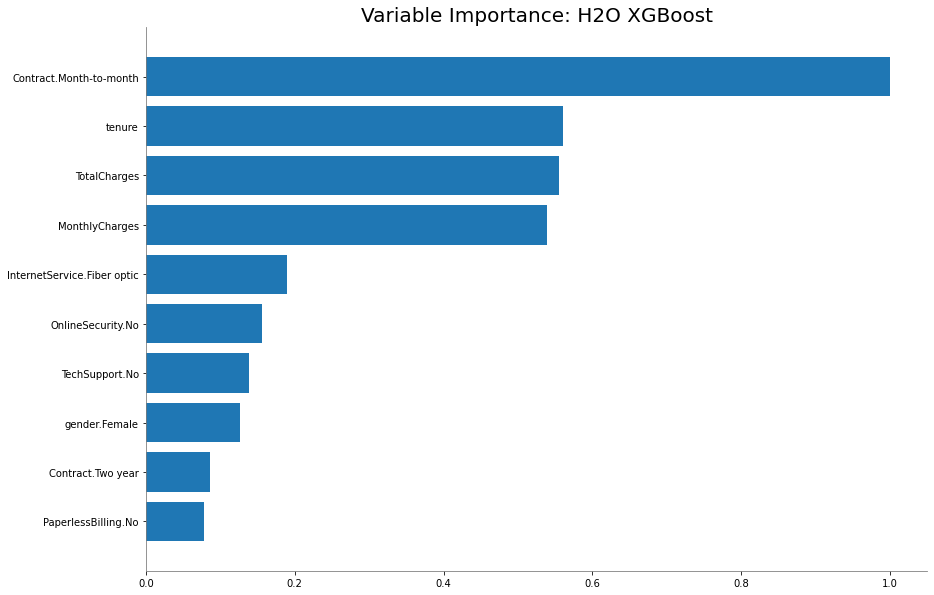

In [36]:
# feature importence
out.varimp_plot()

In [37]:
aml.leader.download_mojo(path = "./")

'/content/GBM_2_AutoML_20210118_083052.zip'